# EDA Airbnb
Vamos a realizar el EDA para su análisis y posterior mente su visualización en powerBI.
Voy a darle un enfoque global usando todo los archivos csv obtenido y creando un solo DataFrame como resultado.

In [ ]:
#cargamos todos los csv y cramos un solo data frame
import pandas as pd
import os

directory = '/content/data'
df_list = []

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)

# Añadimos columna para saber de que ciudad es
        df['cities'] = filename.split('.')[0]
        df_list.append(df)

df = pd.concat(df_list, ignore_index=True)

# Verificar las ciudades únicas presentes en la columna 'cities'
print("Ciudades únicas en el DataFrame:")
print(df['cities'].unique())

#tasa de cambio
exchange_rates = {
    'EUR': 1.10,  # 1 euro = 1.10 dólares
    'JPY': 0.0070,  # 1 yen = 0.007 dólares
    'GBP': 1.25,  # 1 libra = 1.25 dólares
    'AUD': 0.65  # 1 AUD = 0.65 dólares
}
# Mapeo de ciudades con sus respectivas monedas
city_currency = {
    'tokyo_airbnb': 'JPY',
    'london_airbnb': 'GBP',
    'sydney_airbnb': 'AUD',
    'milan_airbnb': 'EUR',
    'madrid_airbnb': 'EUR',
}
# Función para convertir a dólares según la ciudad
def convert_to_usd(value, cities):
    # Convertimos el nombre de la ciudad a minúsculas para evitar problemas de coincidencia
    city = cities.lower()
    currency = city_currency.get(city, None)  # Obtener la moneda de la ciudad

    # Si la ciudad tiene una moneda válida, hacemos la conversión
    if currency and currency in exchange_rates:
        exchange_rate = exchange_rates[currency]
        converted_value = value * exchange_rate
        return round(converted_value, 2)  # Redondeamos a 2 decimales
    else:
        # Si no se encuentra la ciudad o moneda, no se convierte
        return value
df['price_usd'] = df.apply(lambda row: convert_to_usd(row['price'], row['cities']), axis=1)

# Mostramos el data frame
print(df)


Ciudades únicas en el DataFrame:
['london_airbnb' 'milan_airbnb' 'madrid_airbnb' 'tokyo_airbnb' 'NY_airbnb'
 'sydney_airbnb']
              id                                               name  \
0          11551         Arty and Bright London Apartment in Zone 2   
1          13913                Holiday London DB Room Let-on going   
2          90700                  Sunny Notting Hill flat & terrace   
3          15400                Bright Chelsea  Apartment. Chelsea!   
4          92399  MODERN SELF CONTAINED ARCHITECT FLATLET, ISLIN...   
...          ...                                                ...   
220026  30592081                             The top floor paradise   
220027  30592161   Sydney harbour catamaran sailing. Parties for 10   
220028  30592248  Double Room built-in a large and bright apartment   
220029  30592505     Bright Modern apartment in a Premiere location   
220030  30593866   Huge Sunny Double Room with Spa in Best Location   

          host_id    

In [ ]:
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,cities,price_usd
0,11551,Arty and Bright London Apartment in Zone 2,43039,Adriano,NaN,Lambeth,51.46225,-0.11732,Entire home/apt,88,3,185,2019-09-15,1.58,2.0,336.0,london_airbnb,110.00
1,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56802,-0.11121,Private room,65,1,19,2019-10-07,0.17,2.0,365.0,london_airbnb,81.25
2,90700,Sunny Notting Hill flat & terrace,491286,Chil,NaN,Kensington and Chelsea,51.51074,-0.19853,Entire home/apt,105,2,339,2019-07-30,3.33,2.0,268.0,london_airbnb,131.25
3,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,100,30,88,2019-09-23,0.73,1.0,158.0,london_airbnb,125.00
4,92399,"MODERN SELF CONTAINED ARCHITECT FLATLET, ISLIN...",497366,Andrea & Mark,NaN,Islington,51.55071,-0.08547,Private room,77,1,207,2019-10-21,2.04,2.0,336.0,london_airbnb,96.25


# Limpieza de datos
Vamos a empezar la limpieza de datos.
Pasos a seguir:
* Eliminamos columnas innecesarias
* Cambiamos nombres de ciudades
* Eliminamos filas duplicadas
* Menejo de valores faltantes
* Eliminar Outliers extremos (par los precios)
* Mirar si hay que convertir algun valor

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Eliminar filas duplicadas
df = df.drop_duplicates()

In [ ]:
print(df)

              id                                               name  \
0          11551         Arty and Bright London Apartment in Zone 2   
1          13913                Holiday London DB Room Let-on going   
2          90700                  Sunny Notting Hill flat & terrace   
3          15400                Bright Chelsea  Apartment. Chelsea!   
4          92399  MODERN SELF CONTAINED ARCHITECT FLATLET, ISLIN...   
...          ...                                                ...   
220026  30592081                             The top floor paradise   
220027  30592161   Sydney harbour catamaran sailing. Parties for 10   
220028  30592248  Double Room built-in a large and bright apartment   
220029  30592505     Bright Modern apartment in a Premiere location   
220030  30593866   Huge Sunny Double Room with Spa in Best Location   

          host_id        host_name neighbourhood_group  \
0           43039          Adriano                 NaN   
1           54730            Al

In [ ]:
#cambiamos nombres cities
# Diccionario con los cambios que quieres hacer
changes = {
    'madrid_airbnb': 'madrid',
    'NY_airbnb': 'NY',
    'milan_airbnb': 'milan',
    'sydney_airbnb': 'sydney',
    'london_airbnb': 'london',
    'tokyo_airbnb': 'tokyo',
}

# Aplica los cambios
df['cities'] = df['cities'].replace(changes)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220031 entries, 0 to 220030
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              220031 non-null  int64  
 1   name                            219964 non-null  object 
 2   host_id                         220031 non-null  int64  
 3   host_name                       219325 non-null  object 
 4   neighbourhood_group             68513 non-null   object 
 5   neighbourhood                   220031 non-null  object 
 6   latitude                        220031 non-null  float64
 7   longitude                       220031 non-null  float64
 8   room_type                       220031 non-null  object 
 9   price                           220031 non-null  int64  
 10  minimum_nights                  220031 non-null  int64  
 11  number_of_reviews               220031 non-null  int64  
 12  last_review     

In [ ]:
df.isnull().sum()

,0
id,0
name,67
host_id,0
host_name,706
neighbourhood_group,151518
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
# Imputaciones
df['neighbourhood_group'] = df['neighbourhood_group'].fillna(df['neighbourhood_group'].mode()[0])
df['name'] = df['name'].fillna(df['name'].mode()[0])
df['host_name'] = df['host_name'].fillna(df['host_name'].mode()[0])
df['neighbourhood_group'] = df['neighbourhood_group'].fillna(df['neighbourhood_group'].mode()[0])
df['calculated_host_listings_count'] = df['calculated_host_listings_count'].fillna(df['calculated_host_listings_count'].mean())
df['availability_365'] = df['availability_365'].fillna(df['availability_365'].mean())
# last review
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
df['last_review'] = df['last_review'].fillna(df['last_review'].mode()[0])

# reviews per month
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].mean())



In [ ]:
# Eliminar outliers extremos (ejemplo para el precio)
Q1 = df['price_usd'].quantile(0.25)
Q3 = df['price_usd'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Guardar el DataFrame limpio
df.to_csv('airbnb_datos_limpios.csv', index=False)

In [ ]:
# Asegúrate de que 'airbnb_datos_limpios.csv' es el nombre correcto de tu archivo
df = pd.read_csv('airbnb_datos_limpios.csv')
print(df)

              id                                               name  \
0          11551         Arty and Bright London Apartment in Zone 2   
1          13913                Holiday London DB Room Let-on going   
2          90700                  Sunny Notting Hill flat & terrace   
3          15400                Bright Chelsea  Apartment. Chelsea!   
4          92399  MODERN SELF CONTAINED ARCHITECT FLATLET, ISLIN...   
...          ...                                                ...   
220026  30592081                             The top floor paradise   
220027  30592161   Sydney harbour catamaran sailing. Parties for 10   
220028  30592248  Double Room built-in a large and bright apartment   
220029  30592505     Bright Modern apartment in a Premiere location   
220030  30593866   Huge Sunny Double Room with Spa in Best Location   

          host_id        host_name neighbourhood_group  \
0           43039          Adriano           Manhattan   
1           54730            Al

# Análisis Estadístico Descriptivo

In [ ]:
df = pd.read_csv('airbnb_datos_limpios.csv')

# Estadísticas descriptivas
print(df.describe())

# Información sobre tipos de datos y valores no nulos
print(df.info())

# Valores únicos en columnas categóricas
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nValores únicos en {col}:")
    print(df[col].value_counts())

                 id       host_id       latitude      longitude         price  \
count  2.200310e+05  2.200310e+05  220031.000000  220031.000000  2.200310e+05   
mean   2.240831e+07  8.494528e+07      32.573053      16.428135  9.178157e+02   
std    1.175490e+07  8.856607e+07      30.144854      76.030471  8.285217e+03   
min    2.539000e+03  1.944000e+03     -34.135212     -74.244420  0.000000e+00   
25%    1.338370e+07  1.439602e+07      40.412620      -3.705870  5.500000e+01   
50%    2.249789e+07  4.640392e+07      40.794240      -0.128380  9.900000e+01   
75%    3.155445e+07  1.415097e+08      51.496200       9.199535  1.770000e+02   
max    5.095505e+07  4.117208e+08      51.681690     151.339811  1.000046e+06   

       minimum_nights  number_of_reviews  reviews_per_month  \
count   220031.000000      220031.000000      220031.000000   
mean         5.258023          20.129164           1.256772   
std         20.118261          43.012277           1.322755   
min          1.000

# Visualizaciones

<ipython-input-15-122048e2bcde>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


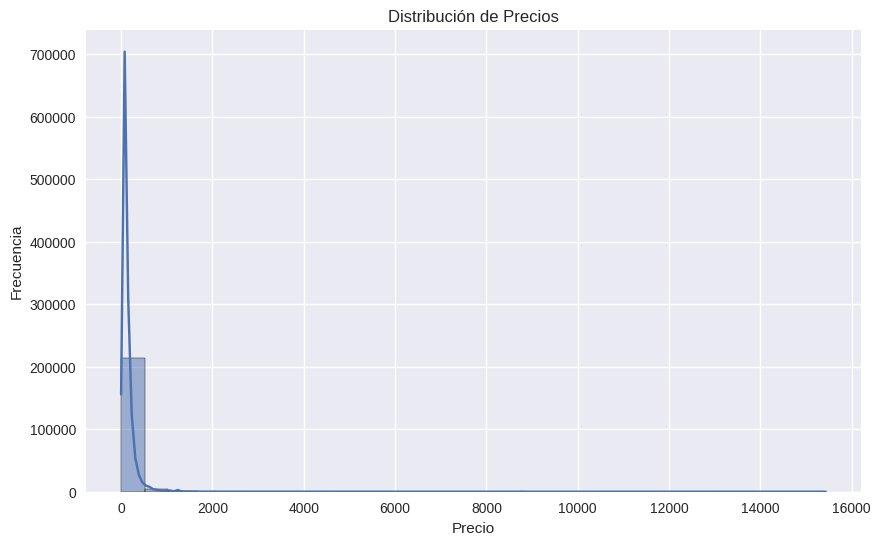

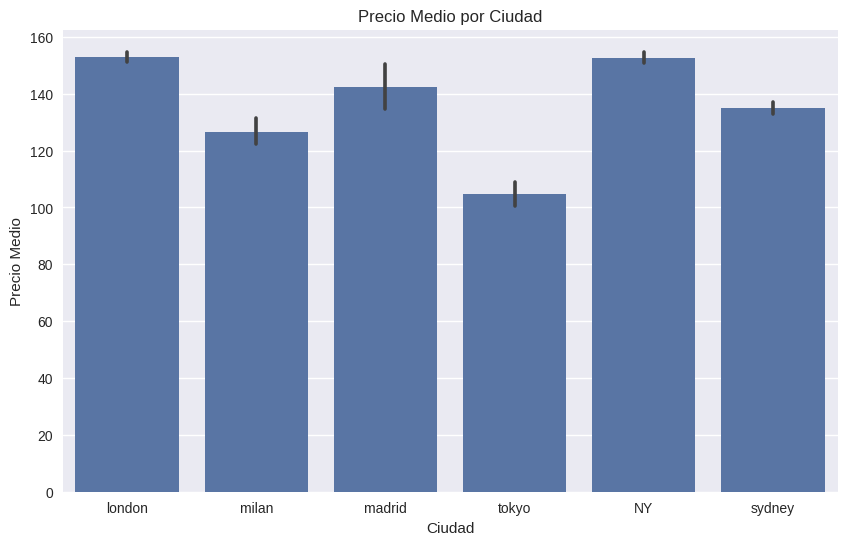

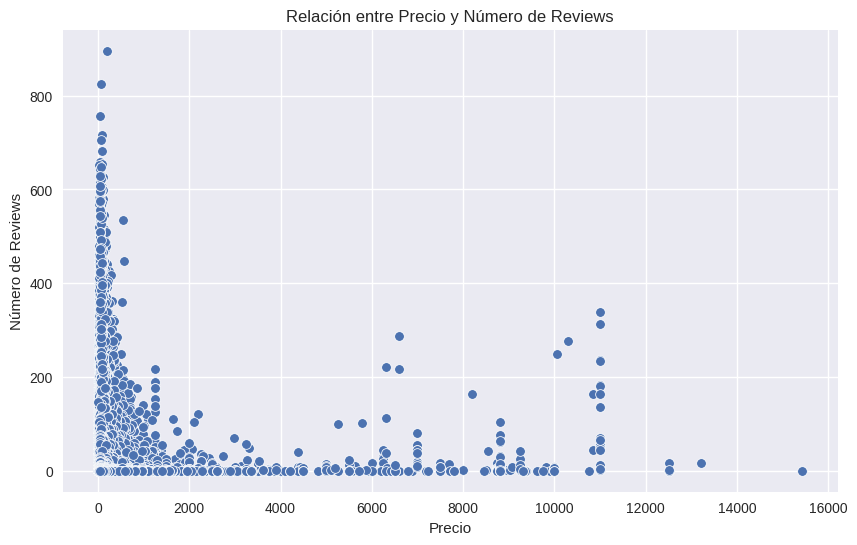

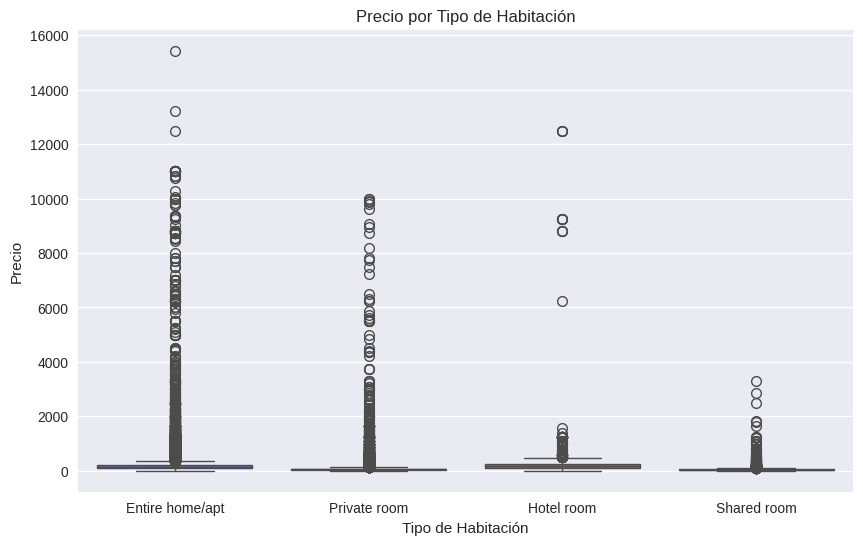

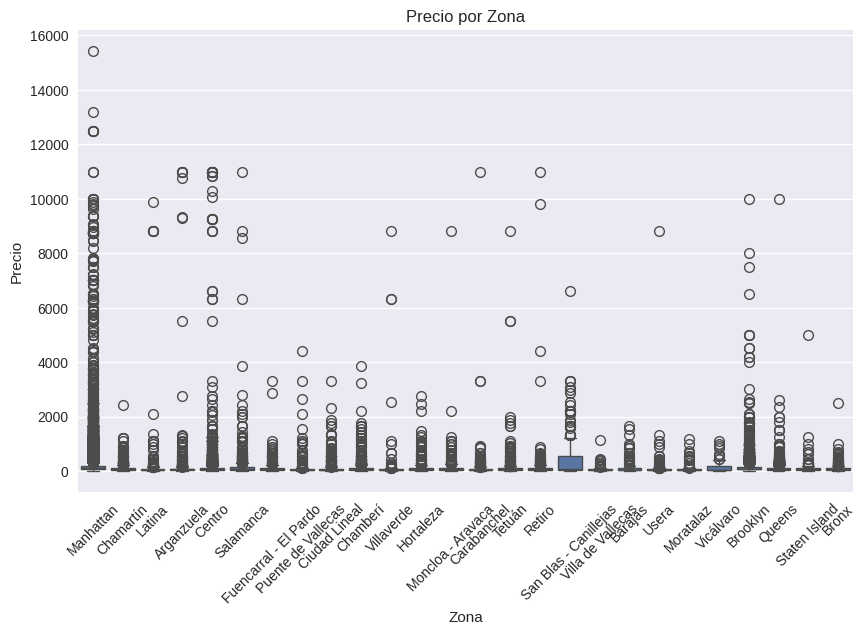

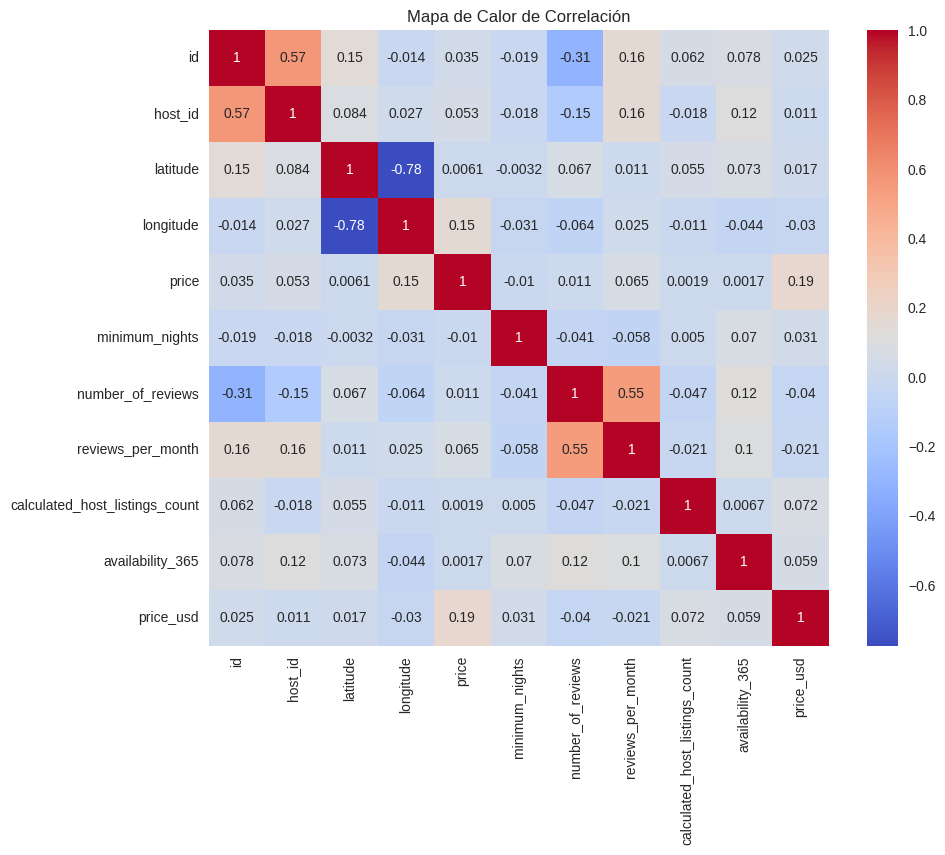

In [ ]:
# Configuración de estilo
plt.style.use('seaborn')
sns.set_palette("deep")

# Distribución de precios
plt.figure(figsize=(10, 6))
sns.histplot(df['price_usd'], bins=30, kde=True)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

# Precio medio por ciudad
plt.figure(figsize=(10, 6))
sns.barplot(x='cities', y='price_usd', data=df)
plt.title('Precio Medio por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Precio Medio')
plt.show()

# Relacion entre precio y reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price_usd', y='number_of_reviews', data=df)
plt.title('Relación entre Precio y Número de Reviews')
plt.xlabel('Precio')
plt.ylabel('Número de Reviews')
plt.show()

# Habitaciones y precio
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price_usd', data=df)
plt.title('Precio por Tipo de Habitación')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Precio')
plt.show()


# Box plot de precios y tipo de zona
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_group', y='price_usd', data=df)
plt.title('Precio por Zona')
plt.xlabel('Zona')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.show()

# Mapa de calor de correlación - Solo para columnas numéricas
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()





## Análisis de Outliers

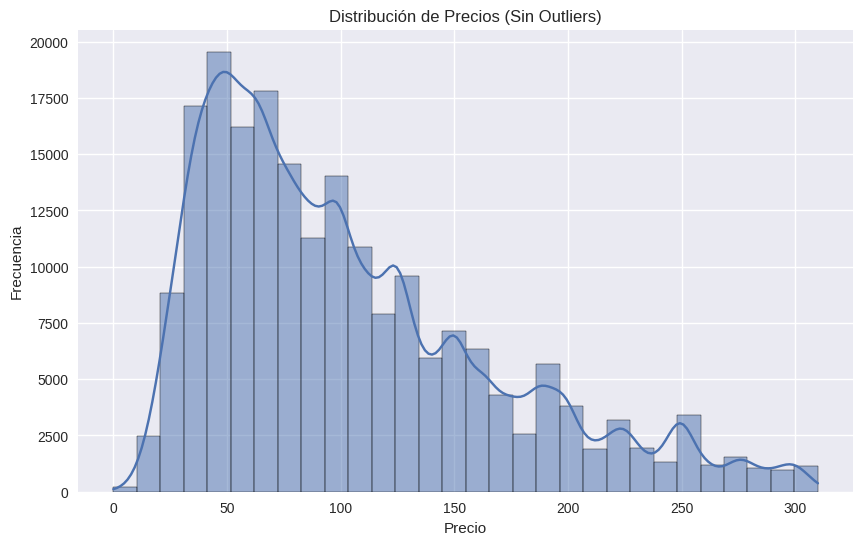

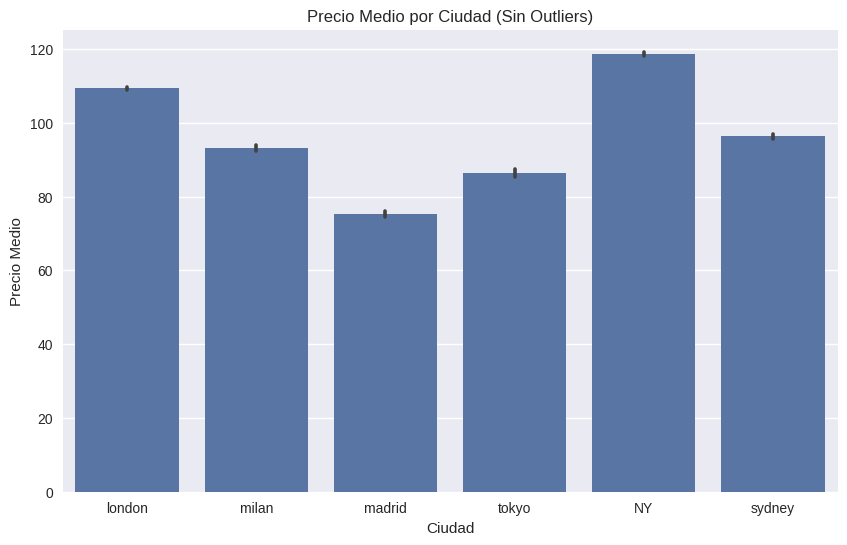

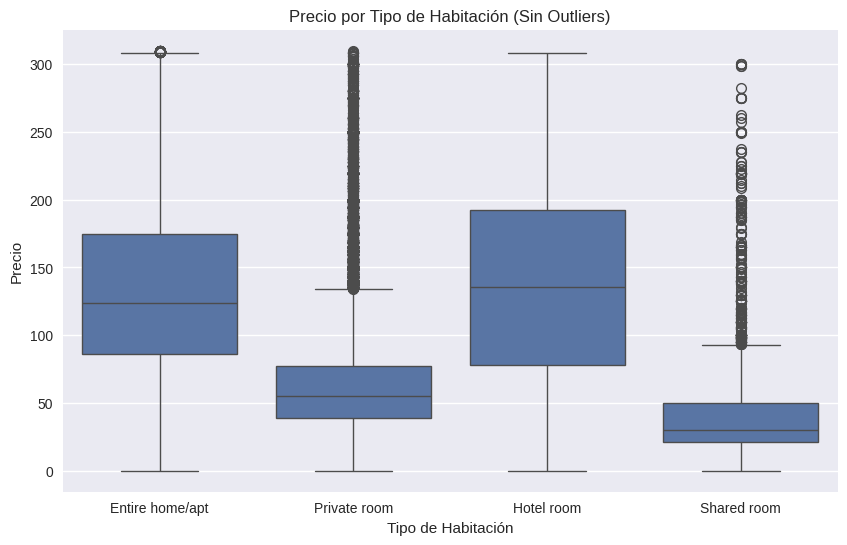

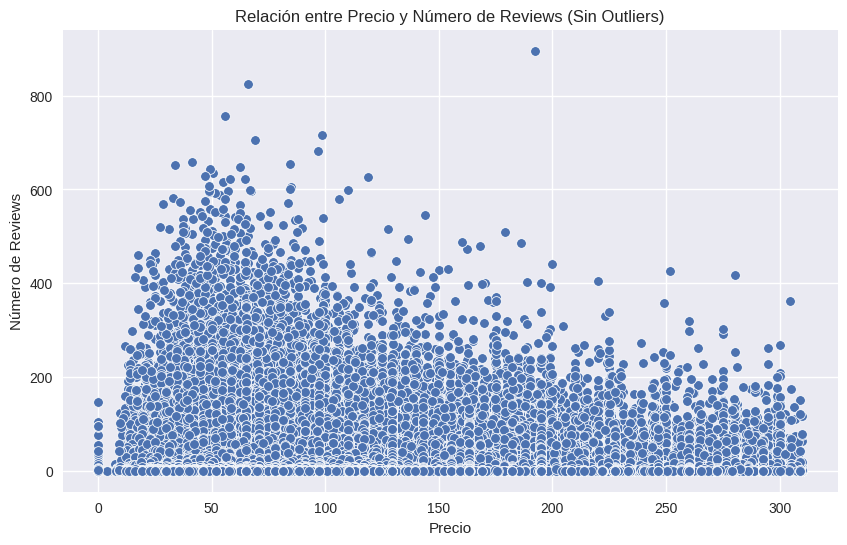

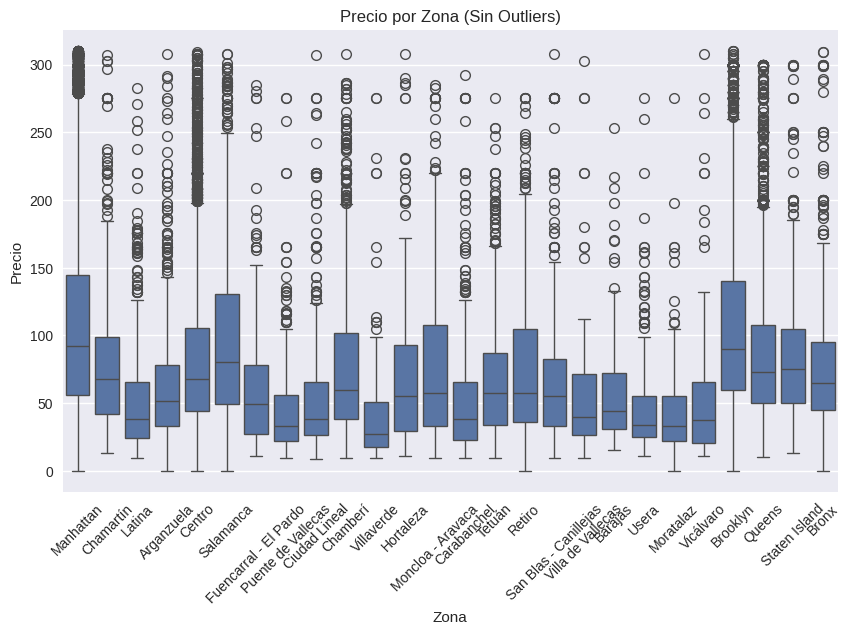

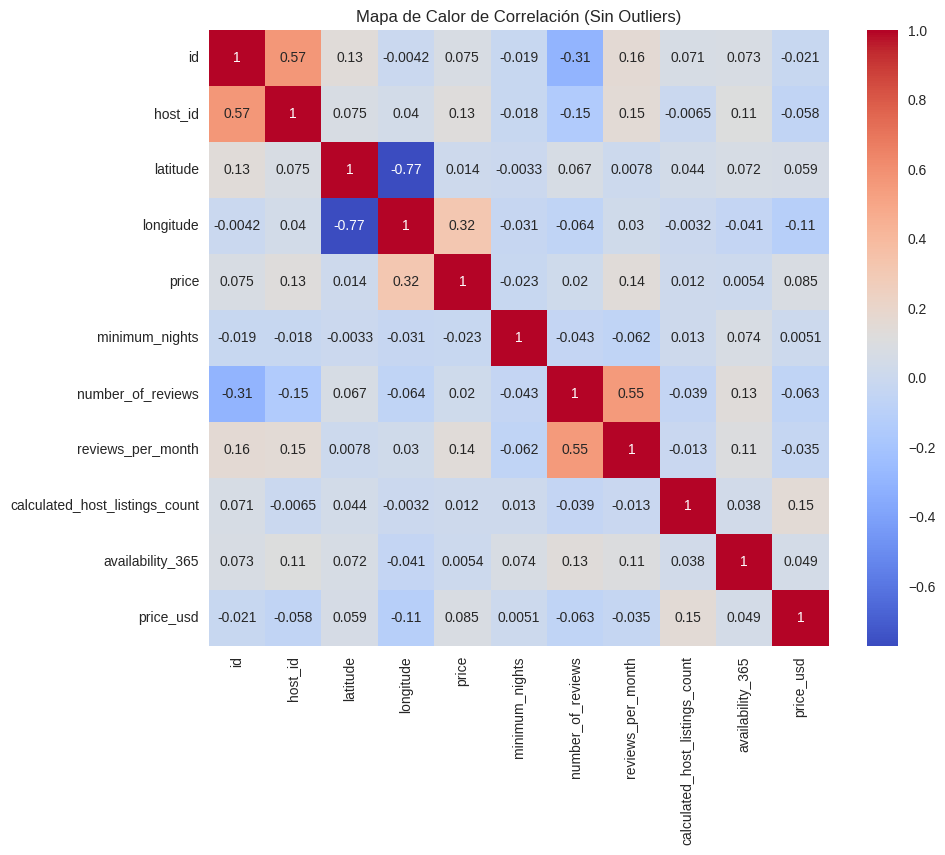

In [ ]:
# Calcular el rango intercuartil (IQR)
Q1 = df['price_usd'].quantile(0.25)
Q3 = df['price_usd'].quantile(0.75)
IQR = Q3 - Q1

# Definir el rango para identificar outliers (por ejemplo, 1.5 veces el IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los precios que estén dentro del rango
df_no_outliers = df[(df['price_usd'] >= lower_bound) & (df['price_usd'] <= upper_bound)]


# Distriubución de precio sin outliers
plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers['price_usd'], bins=30, kde=True)
plt.title('Distribución de Precios (Sin Outliers)')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de precio medio por ciudad sin outliers
plt.figure(figsize=(10, 6))
sns.barplot(x='cities', y='price_usd', data=df_no_outliers)
plt.title('Precio Medio por Ciudad (Sin Outliers)')
plt.xlabel('Ciudad')
plt.ylabel('Precio Medio')
plt.show()

# distribución tipo de habitacion y precio sin outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price_usd', data=df_no_outliers)
plt.title('Precio por Tipo de Habitación (Sin Outliers)')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Precio')
plt.show()

# Relación entre precio y reviews sin outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price_usd', y='number_of_reviews', data=df_no_outliers)
plt.title('Relación entre Precio y Número de Reviews (Sin Outliers)')
plt.xlabel('Precio')
plt.ylabel('Número de Reviews')
plt.show()

# relacion entre precio por zona sin outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_group', y='price_usd', data=df_no_outliers)
plt.title('Precio por Zona (Sin Outliers)')
plt.xlabel('Zona')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.show()

# Mapa de calor de correlación sin outliers
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation calculation
numeric_df = df_no_outliers.select_dtypes(include=['number']) # Filter for numeric columns before calculating correlation
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación (Sin Outliers)')
plt.show()

 ## Análisis de Tendencias Temporales

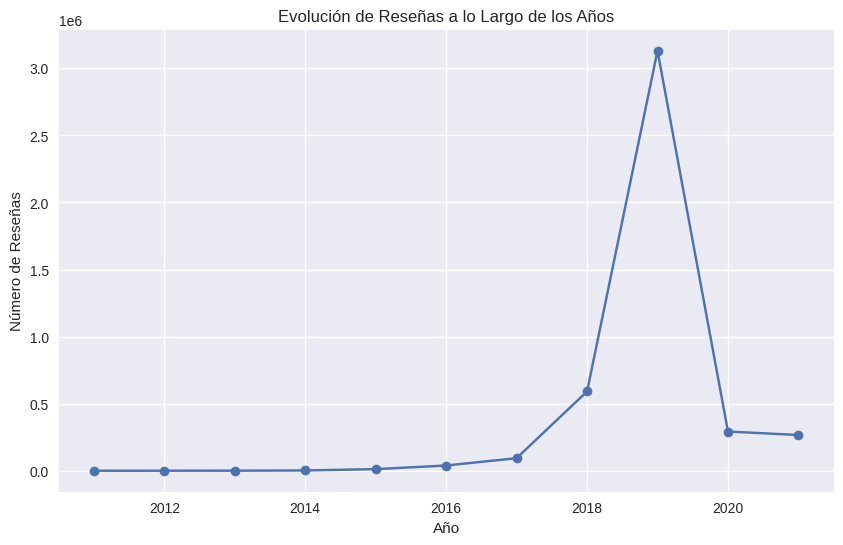

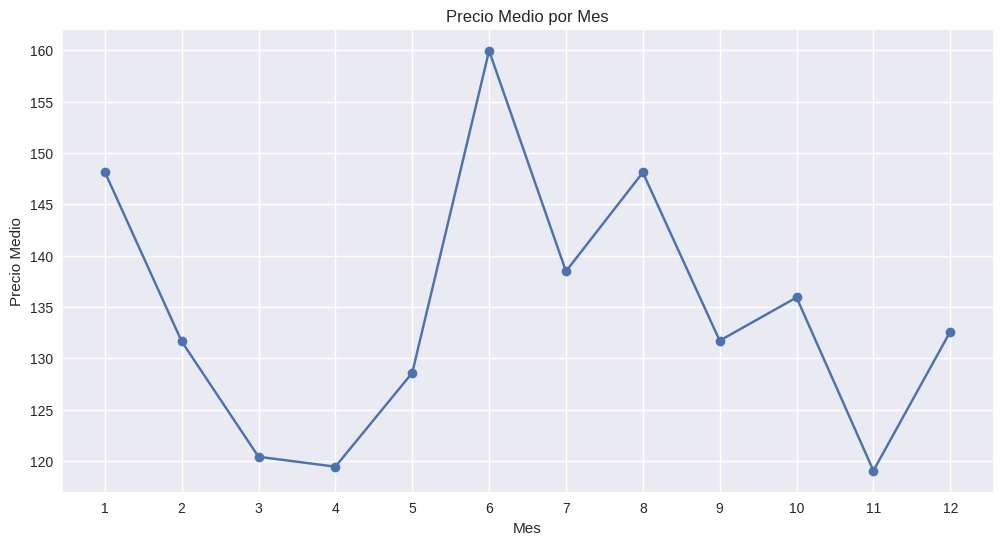

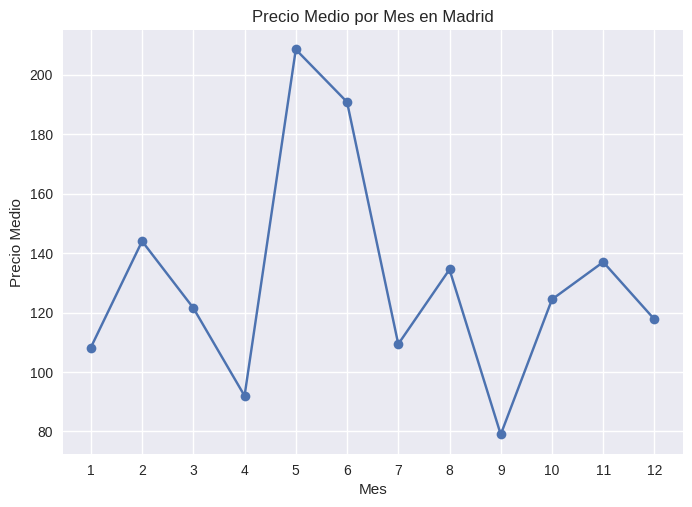

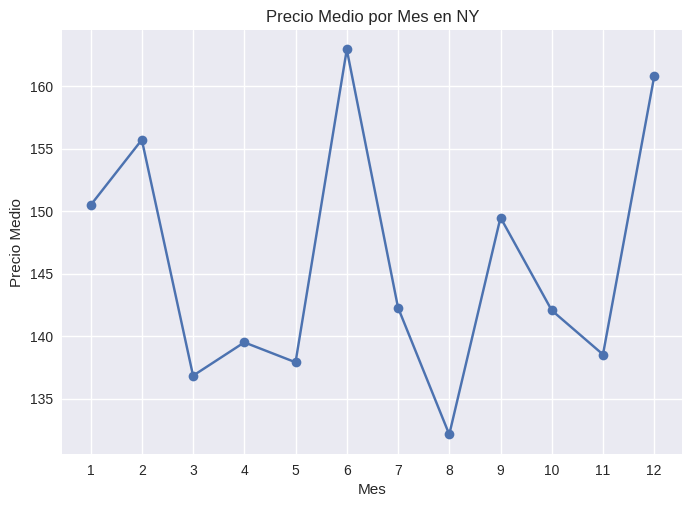

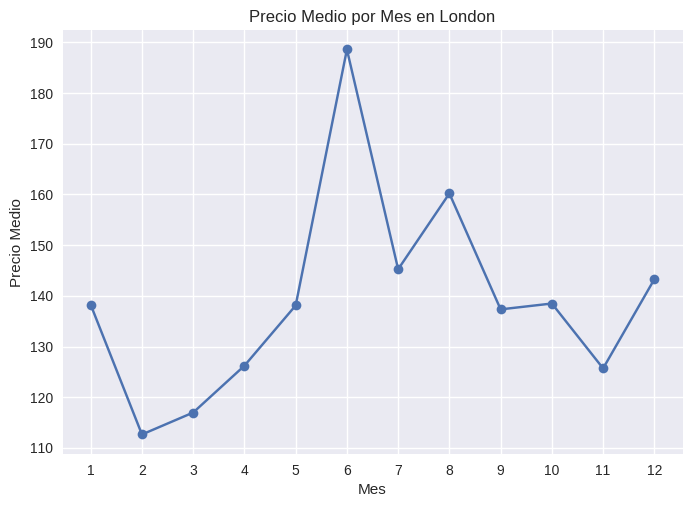

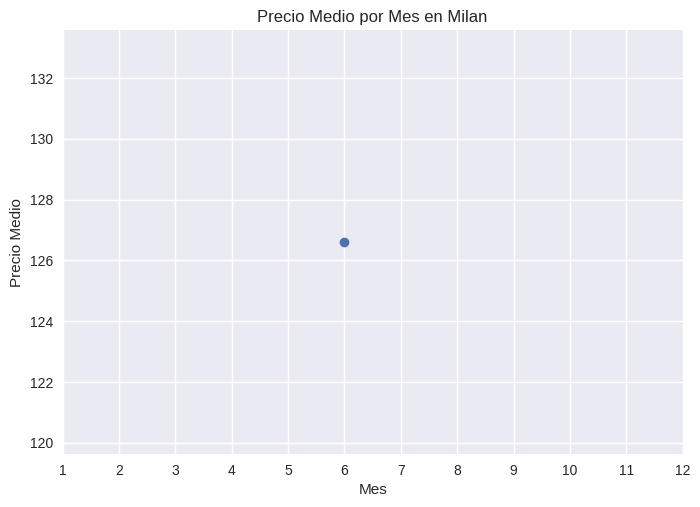

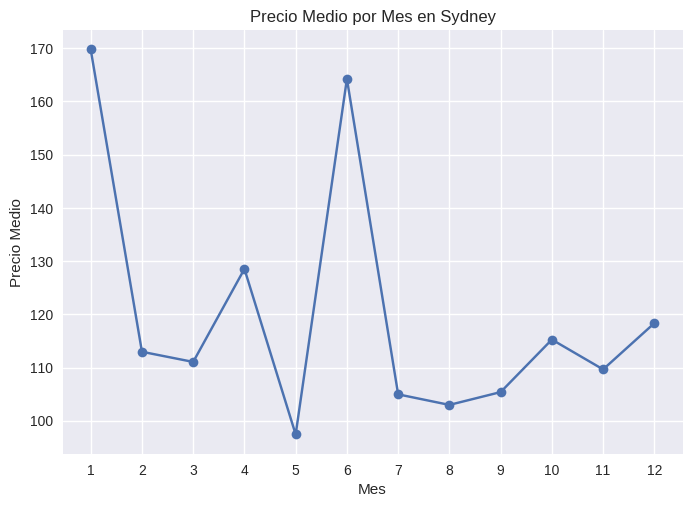

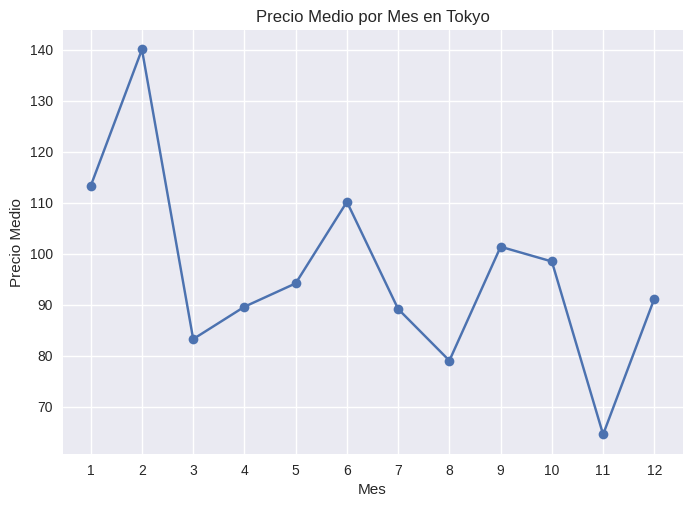

In [ ]:
df = pd.read_csv('airbnb_datos_limpios.csv')

# Convertir la columna 'last_review' a tipo datetime
df['last_review'] = pd.to_datetime(df['last_review'])

# Extraer el año de la columna 'last_review'
df['year'] = df['last_review'].dt.year

# Agrupar por año y contar el número de reseñas
reviews_per_year = df.groupby('year')['number_of_reviews'].sum()

# Gráfico de líneas para mostrar la evolución de las reseñas
plt.figure(figsize=(10, 6))
reviews_per_year.plot(kind='line', marker='o')

plt.title('Evolución de Reseñas a lo Largo de los Años')
plt.xlabel('Año')
plt.ylabel('Número de Reseñas')
plt.show()

# Analisis de tendencia del precio por mes
plt.figure(figsize=(12, 6))
df['month'] = df['last_review'].dt.month
price_by_month = df.groupby('month')['price_usd'].mean()
plt.plot(price_by_month.index, price_by_month.values, marker='o')
plt.title('Precio Medio por Mes')
plt.xlabel('Mes')
plt.ylabel('Precio Medio')
plt.xticks(range(1, 13))
plt.show()

# Tendencia de precio madrid
madrid_df = df[df['cities'] == 'madrid']
madrid_price_by_month = madrid_df.groupby('month')['price_usd'].mean()
plt.plot(madrid_price_by_month.index, madrid_price_by_month.values, marker='o')
plt.title('Precio Medio por Mes en Madrid')
plt.xlabel('Mes')
plt.ylabel('Precio Medio')
plt.xticks(range(1, 13))
plt.show()

# Tendencia de precio NY
NY_df = df[df['cities'] == 'NY']
NY_price_by_month = NY_df.groupby('month')['price_usd'].mean()
plt.plot(NY_price_by_month.index, NY_price_by_month.values, marker='o')
plt.title('Precio Medio por Mes en NY')
plt.xlabel('Mes')
plt.ylabel('Precio Medio')
plt.xticks(range(1, 13))
plt.show()

# Tendencia de precio london
london_df = df[df['cities'] == 'london']
london_price_by_month = london_df.groupby('month')['price_usd'].mean()
plt.plot(london_price_by_month.index, london_price_by_month.values, marker='o')
plt.title('Precio Medio por Mes en London')
plt.xlabel('Mes')
plt.ylabel('Precio Medio')
plt.xticks(range(1, 13))
plt.show()

# Tendencias de precio milan
milan_df = df[df['cities'] == 'milan']
milan_price_by_month = milan_df.groupby('month')['price_usd'].mean()
plt.plot(milan_price_by_month.index, milan_price_by_month.values, marker='o')
plt.title('Precio Medio por Mes en Milan')
plt.xlabel('Mes')
plt.ylabel('Precio Medio')
plt.xticks(range(1, 13))
plt.show()

# Tendencias de precio sydney
sydney_df = df[df['cities'] == 'sydney']
sisydeny_price_by_month = sydney_df.groupby('month')['price_usd'].mean()
plt.plot(sisydeny_price_by_month.index, sisydeny_price_by_month.values, marker='o')
plt.title('Precio Medio por Mes en Sydney')
plt.xlabel('Mes')
plt.ylabel('Precio Medio')
plt.xticks(range(1, 13))
plt.show()

#tendencias de precio tokyo
tokyo_df = df[df['cities'] == 'tokyo']
tokyo_price_by_month = tokyo_df.groupby('month')['price_usd'].mean()
plt.plot(tokyo_price_by_month.index, tokyo_price_by_month.values, marker='o')
plt.title('Precio Medio por Mes en Tokyo')
plt.xlabel('Mes')
plt.ylabel('Precio Medio')
plt.xticks(range(1, 13))
plt.show()
